<H1>Bidirectional connections as a function of the distance </H1>
We will test whether bidirectionally connected inhibitory interneurons are over-represented as a function of the intersomatic distance.

In [54]:
%pylab inline
import warnings
from inet import DataLoader, __version__
from inet.motifs import iicounter
from inet.utils import II_slice
print('Inet version {}'.format(__version__))

Populating the interactive namespace from numpy and matplotlib
Inet version 0.0.13


`%matplotlib` prevents importing * from pylab and numpy


In [3]:
# use filenames in the dataset to read list of distances to be read
mydataset = DataLoader('../data/PV')

pvfiles = [ i for i in range(len(mydataset)) if int(mydataset.filename(i)[0])>1 ]
print('{} experiments with 2 or more PV-cells'.format(len(pvfiles)))

 190 syn  files loaded
39 experiments with 2 or more PV-cells


<H2> Load all distances from connected PV cells</H2>

In [121]:
# read distances from between inhibitory neurons
def read_dist(fname):
    """
    get distances between inhibitory pairs of neurons
    from a matrix of intersomatic distances.
    Argument:
    fname: string
        the matrix name to that contains the connected synapses (*.syn)
    """
    # take all non-diagonal elements
    mypath = '../data/PV/' + fname[:-3] + 'dist'
    
    try:
        D = np.loadtxt(mypath)
        D = II_slice(D, int(fname[0]))
        idx = np.where(~np.eye(D.shape[0], dtype = bool))
        mydist = np.abs(D[idx]).tolist()
        return(mydist)
    
    except IOError:
        warnings.warn(mypath + ' not found!')
        return([])
    

In [122]:
dist_tested = list()
for i in pvfiles:
    dist_tested +=  read_dist(mydataset.filename(i))


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:21: UserWarning: ../data/PV/2_170411_02.dist not found!
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:21: UserWarning: ../data/PV/2_170315_02.dist not found!


In [123]:
print('{} total distances read'.format(len(dist_tested)))

106 total distances read


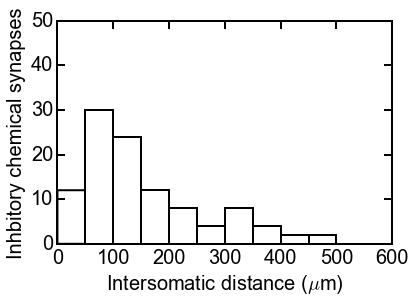

In [124]:
mybins = arange(0,600, 50)

plt.hist(dist_tested, bins = mybins, facecolor='white', lw=2);
plt.ylim(ymax=50);
plt.ylabel('Inhbitory chemical synapses');
plt.xlabel('Intersomatic distance ($\mu$m)');

<H2>Distances in recurrently connected inhibitory neurons</H2>

In [206]:
def read_rec_dist(fname):
    """
    get distances between bidirectionally connected interneurons
    from a matrix of intersomatic distances.
    
    Argument:
    fname: string
        the matrix name to that contains the connected synapses (*.syn)
    """
    # take all non-diagonal elements
    mydistpath = '../data/PV/' + fname[:-3] + 'dist'

    try:
        D = II_slice(np.loadtxt(mydistpath), int(fname[0]))
        
    except IOError:
        warnings.warn(mydistpath + ' not found!')
        return([])
    
    try:
        S = np.loadtxt('../data/PV/'+fname)
        
    except IOError:
        warnings.warn(fname + ' not found!')
        return([])
    
    S = II_slice(S, int(fname[0]))
    S[S==2] = 0 # remove gaps
    S[S==3] = 1 # remove gaps in chemical
        
    x,y = np.nonzero(S)
    ids = zip(x,y)
    mydist = list()
    if ids>0:
        for i,j in ids:
            if S[j,i] == 1:
                mydist.append(D[i,j])
     
    print(np.unique(np.abs(mydist)))  
    return( np.unique(np.abs(mydist)).tolist() )


In [159]:
# Number of bidirectionally connected interneurons
mydataset.motif['ii_c2']

{'found': 9, 'tested': 55}

In [160]:
# select experiments with bidirectional motifs
mybidirec = [i for i in range(len(mydataset)) if mydataset.motifs(i)['ii_c2']['found']>0 ]

for i in mybidirec:
    print('Experiment {:3d}, filename: {}'.format(i, mydataset.filename(i)))

Experiment   3, filename: 3_170824_01.syn
Experiment  45, filename: 3_170829_01.syn
Experiment  46, filename: 2_171002_01.syn
Experiment  59, filename: 3_170830_02.syn
Experiment  65, filename: 2_170328_02.syn
Experiment  75, filename: 2_170907_01.syn
Experiment  84, filename: 2_170315_01.syn
Experiment 158, filename: 2_160523_02.syn
Experiment 159, filename: 2_170329_01.syn


In [211]:
dist_found = list()
for i in mybidirec:
    dist_found += read_rec_dist(mydataset.filename(i))

[ 144.958]
[ 76.897]
[ 100.958]
[ 54.754]
[ 86.239]
[ 206.317]
[ 49.522]
[ 66.983]
[ 45.971]


In [212]:
dist_found

[144.958, 76.897, 100.958, 54.754, 86.239, 206.317, 49.522, 66.983, 45.971]

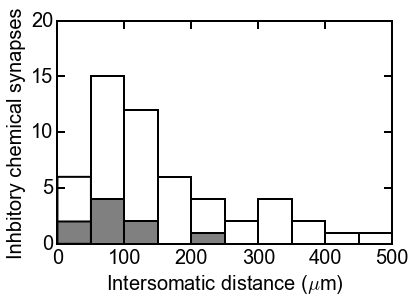

In [226]:
mybins = arange(0,550, 50)
bid_tested = np.unique(dist_tested)
plt.hist(bid_tested, bins = mybins, facecolor='white', lw=2);
plt.ylim(ymax=20);
plt.ylabel('Inhbitory chemical synapses');
plt.xlabel('Intersomatic distance ($\mu$m)');

plt.hist(dist_found, bins = mybins, facecolor='gray', lw=2);
